# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'/Users/Mahsa/Desktop/CS 7324/data/house prices/train.csv')
test = pd.read_csv(r'/Users/Mahsa/Desktop/CS 7324/data/house prices/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# assign a variable that indicates which dataset the observation belongs to
# create a SalePrice column in the test set to mirror the columns in the train set
train2 = train.assign(data = "train")
test2 = test.assign(data = "test", SalePrice = np.nan)

In [4]:
test2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,data,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [5]:
# keep up with unique Ids of the observations 
train_id = train.Id
test_id = test.Id

In [6]:
# merge the train and test set for cleaning
# nullify the Id variable as it won't be necessary for these analyses 
df = pd.concat([train2, test2])
data = df.assign(Id = np.nan)

In [7]:
## check
# print(len(train.Id) + len(test.Id))
# print(df.info())
# print(data.info())

In [8]:
# fix indexes so they are reflective of respective Ids from the train and test set
data = data.reset_index()

In [9]:
# replace NAs that are meaningful to the dataset. 
# according to data dictionary, the following variables have 'NA' categories that are *not* indicative of 
# missing values
data[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
      'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
      'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = data[['Alley', 'BsmtQual', 
                                                               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                                                               'BsmtFinType2', 'FireplaceQu', 'GarageType',
                                                               'GarageFinish', 'GarageQual', 'GarageCond', 
                                                               'PoolQC', 'Fence', 'MiscFeature']].fillna('none')

In [10]:
## recode ordinal variables to reflect their ranks 
# data.PoolQC.value_counts()
data.PoolQC = data.PoolQC.replace({'none' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.PoolQC.value_counts()
# data.FireplaceQu.value_counts()
data.FireplaceQu = data.FireplaceQu.replace({'none' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.FireplaceQu.value_counts()
# data.LotShape.value_counts()
data.LotShape = data.LotShape.replace({'IR3' : 0, 'IR2' : 1, 'IR1' : 2, 'Reg' : 3})
# data.LotShape.value_counts()
# data.GarageFinish.value_counts()
data.GarageFinish = data.GarageFinish.replace({'none' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3})
# data.GarageFinish.value_counts()
# data.GarageQual.value_counts()
data.GarageQual = data.GarageQual.replace({'none' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.GarageQual.value_counts()
# data.GarageCond.value_counts()
data.GarageCond = data.GarageCond.replace({'none' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.GarageCond.value_counts()
# data.BsmtQual.value_counts()
data.BsmtQual = data.BsmtQual.replace({'none' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.BsmtQual.value_counts()
# data.BsmtCond.value_counts()
data.BsmtCond = data.BsmtCond.replace({'none' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.BsmtCond.value_counts()
# data.BsmtExposure.value_counts()
data.BsmtExposure = data.BsmtExposure.replace({'none' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4})
# data.BsmtExposure.value_counts()
# data.BsmtFinType1.value_counts()
data.BsmtFinType1 = data.BsmtFinType1.replace({'none' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 
                                               'ALQ' : 5, 'GLQ' : 6})
# data.BsmtFinType1.value_counts()
# data.BsmtFinType2.value_counts()
data.BsmtFinType2 = data.BsmtFinType2.replace({'none' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 
                                               'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6})
# data.BsmtFinType2.value_counts()

- since common brick/none is close in median sale price, but the other two categories represented in the dataset seem to have notable difference in sale prices, ordinality is adjusted accordingly 

In [11]:
# data.MasVnrType.value_counts()
data.MasVnrType = data.MasVnrType.replace({'None' : 0, 'BrkCmn' : 0, 'BrkFace' : 1, 'Stone' : 2})
# data.MasVnrType.value_counts()
# data.KitchenQual.value_counts()
data.KitchenQual = data.KitchenQual.replace({'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.KitchenQual.value_counts()
# data.Functional.value_counts()
data.Functional = data.Functional.replace({'Sal' : 0, 'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4, 
                                           'Min2' : 5, 'Min1' : 6, 'Typ' : 7})
# data.Functional.value_counts()
# data.ExterQual.value_counts()
data.ExterQual = data.ExterQual.replace({'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.ExterQual.value_counts()
# data.ExterCond.value_counts()
data.ExterCond = data.ExterCond.replace({'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.ExterCond.value_counts()
# data.HeatingQC.value_counts()
data.HeatingQC = data.HeatingQC.replace({'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
# data.HeatingQC.value_counts()
# data.CentralAir.value_counts()
data.CentralAir = data.CentralAir.replace({'Y' : 1, 'N' : 0})
# data.CentralAir.value_counts()
# data.LandSlope.value_counts()
data.LandSlope = data.LandSlope.replace({'Sev' : 0, 'Mod' : 1, 'Gtl' : 2})
# data.LandSlope.value_counts()
# data.Street.value_counts()
data.Street = data.Street.replace({'Grvl' : 0, 'Pave' : 1})
# data.Street.value_counts()
# data.PavedDrive.value_counts()
data.PavedDrive = data.PavedDrive.replace({'N' : 0, 'P' : 1, 'Y' : 2})
# data.PavedDrive.value_counts()

In [12]:
# 3 obs where the pool quality variable indicates No pool, but the area of the pool is greater than 0
data[(data['PoolQC'] == 0) & (data['PoolArea'] > 0)][['PoolArea', 'PoolQC', 'OverallQual']]

,PoolArea,PoolQC,OverallQual
2420,368,0,4
2503,444,0,6
2599,561,0,3


In [13]:
# manually imputing pool quality for 3 obs based on OverallQual
data.loc[2420, ['PoolQC']] = 2
data.loc[2503, ['PoolQC']] = 3
data.loc[2599, ['PoolQC']] = 2

In [14]:
# 157 obs align with 'NA' category for Garages
data[(data['GarageType'] == 'none') & (data['GarageFinish'] == 0) & (data['GarageCond'] == 0) &
     (data['GarageQual'] == 0)][['GarageCars', 'GarageArea', 'GarageType','GarageCond', 
                                 'GarageQual', 'GarageFinish']]

,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish
39,0.0,0.0,none,0,0,0
48,0.0,0.0,none,0,0,0
78,0.0,0.0,none,0,0,0
88,0.0,0.0,none,0,0,0
89,0.0,0.0,none,0,0,0
...,...,...,...,...,...,...
2893,0.0,0.0,none,0,0,0
2909,0.0,0.0,none,0,0,0
2913,0.0,0.0,none,0,0,0
2914,0.0,0.0,none,0,0,0


In [15]:
# 2 obs where Garage variables are not all telling the same story
data[(data['GarageType'] != 'none') & (data['GarageFinish'] == 0)][['GarageCars', 'GarageArea', 'GarageType',
                                                                    'GarageCond', 'GarageQual', 'GarageFinish']]

,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish
2126,1.0,360.0,Detchd,0,0,0
2576,NaN,NaN,Detchd,0,0,0


In [16]:
# manual imputation based on context: 
data.loc[2576, ['GarageCars']] = 0
data.loc[2576, ['GarageArea']] = 0
data.loc[2576, ['GarageType']] = 'none'
# for imputing in future step:
data.loc[2126, ['GarageCond']] = np.nan
data.loc[2126, ['GarageQual']] = np.nan
data.loc[2126, ['GarageFinish']] = np.nan

In [17]:
# 79 obs with missing variables for basement 
data[(data['BsmtFinType1'] == 0) & (data['BsmtFinType2'] == 0) & (data['BsmtQual'] == 0) & 
     (data['BsmtExposure'] == 0) & (data['BsmtCond'] == 0)]

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
17,17,NaN,90,RL,72.0,10791,1,none,3,Lvl,...,0,none,Shed,500,10,2006,WD,Normal,90000.0,train
39,39,NaN,90,RL,65.0,6040,1,none,3,Lvl,...,0,none,none,0,6,2008,WD,AdjLand,82000.0,train
90,90,NaN,20,RL,60.0,7200,1,none,3,Lvl,...,0,none,none,0,7,2006,WD,Normal,109900.0,train
102,102,NaN,90,RL,64.0,7018,1,none,3,Bnk,...,0,none,none,0,6,2009,WD,Alloca,118964.0,train
156,156,NaN,20,RL,60.0,7200,1,none,3,Lvl,...,0,none,none,0,6,2006,WD,Normal,109500.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,1343,NaN,20,RL,100.0,21370,1,none,3,Lvl,...,0,none,Shed,600,6,2006,WD,Normal,NaN,test
2804,1344,NaN,30,RL,55.0,8250,1,none,3,Lvl,...,0,none,none,0,6,2006,WD,Normal,NaN,test
2824,1364,NaN,20,RL,80.0,12048,1,none,3,Lvl,...,0,none,none,0,4,2006,WD,Normal,NaN,test
2891,1431,NaN,30,C (all),69.0,12366,1,none,3,Lvl,...,0,none,none,0,10,2006,WD,Abnorml,NaN,test


In [18]:
# 9 obs where Basement variables are not all telling the same story 
data[(data['BsmtFinType1'] != 0) & ((data['BsmtFinType2'] == 0) | (data['BsmtQual'] == 0) | 
     (data['BsmtExposure'] == 0) | (data['BsmtCond'] == 0))][['BsmtCond', 'BsmtQual', 'BsmtExposure', 
                                                              'BsmtFinType1', 'BsmtFinType2']]

,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2
332,3,4,1,6,0
948,3,4,0,1,1
1487,3,4,0,1,1
2040,0,4,2,6,3
2185,0,3,1,4,1
2217,2,0,1,1,1
2218,3,0,1,1,1
2348,3,4,0,1,1
2524,0,3,3,5,1


In [19]:
# for imputation purposes:
data.loc[(2040, 2185), ['BsmtCond']] = np.nan
data.loc[(2217, 2218), ['BsmtQual']] = np.nan
data.loc[(948, 1487, 2348), ['BsmtExposure']] = np.nan
data.loc[332, ['BsmtFinType2']] = np.nan

In [20]:
# 1 obs indicating no Basement but not reflecting that for numeric Basement variables
data[data['BsmtFinSF1'].isnull()][['BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
                                   'BsmtHalfBath']]

,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2120,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# fixing that
data.loc[2120, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = 0

In [22]:
# still some missingness in BsmtFull/HalfBath
# print(data.BsmtFinSF1.isnull().sum())
# print(data.BsmtFinSF2.isnull().sum())
# print(data.BsmtUnfSF.isnull().sum())
# print(data.TotalBsmtSF.isnull().sum())
# print(data.BsmtFullBath.isnull().sum())
# print(data.BsmtHalfBath.isnull().sum())

In [23]:
# another obs indicating no Basement but not reflecting that for numeric Basement number of bathrooms variables
data[data['BsmtFullBath'].isnull()][['BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
                                   'BsmtHalfBath']]

,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2188,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [24]:
# fixing that
data.loc[2188, ['BsmtFullBath']] = 0
data.loc[2188, ['BsmtHalfBath']] = 0

In [25]:
# checking missingness on Masonry veneer
# print(data.MasVnrType.isnull().sum())
# print(data.MasVnrArea.isnull().sum())

In [26]:
# identifying observations that have missing Masonry veneer variables 
data[(data['MasVnrType'].isnull()) | (data['MasVnrArea'].isnull())][[col for col in data.columns if 'Mas' in col]]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [27]:
# assuming 0 for all observations above for both variables 
data[['MasVnrType', 'MasVnrArea']] = data[['MasVnrType', 'MasVnrArea']].fillna(0)

In [28]:
# identifying observations where Masonry veneer type indicates None is present, but Area indicates that it exists
data[(data['MasVnrType'] == 0) & (data['MasVnrArea'] > 0)][[col for col in data.columns if 'Mas' in col]]

,MasVnrType,MasVnrArea
83,0.0,66.0
91,0.0,203.0
173,0.0,491.0
249,0.0,472.0
273,0.0,183.0
459,0.0,161.0
479,0.0,435.0
510,0.0,70.0
609,0.0,192.0
624,0.0,288.0


In [29]:
mas_idx = data.index[(data['MasVnrType'] == 0) & (data['MasVnrArea'] > 0)].tolist()
data.loc[mas_idx, ['MasVnrType']] = np.nan
# needs imputing 
data[(data['MasVnrType'].isnull()) & (data['MasVnrArea'] > 0)][[col for col in data.columns if 'Mas' in col]]

,MasVnrType,MasVnrArea
83,NaN,66.0
91,NaN,203.0
173,NaN,491.0
249,NaN,472.0
273,NaN,183.0
459,NaN,161.0
479,NaN,435.0
510,NaN,70.0
609,NaN,192.0
624,NaN,288.0


In [30]:
# one obs needs imputing on KitchenQual
data[data['KitchenQual'].isnull()][[col for col in data.columns if 'Kitchen' in col]]

,KitchenAbvGr,KitchenQual
1555,1,NaN


In [31]:
# 2 obs need imputing on Functionality 
data[data['Functional'].isnull()][['OverallQual', 'Functional']]

,OverallQual,Functional
2216,1,NaN
2473,4,NaN


In [32]:
# print(data.info())

In [54]:
# observing the missingness for all variables above that indicate less than 2919 non-null instances
# print(data.MSZoning.isnull().sum())
# print(data.LotFrontage.isnull().sum())
# print(data.Utilities.isnull().sum())
# print(data.Exterior1st.isnull().sum())
# print(data.Exterior2nd.isnull().sum())
# print(data.MasVnrType.isnull().sum())
# print(data.BsmtQual.isnull().sum())
# print(data.BsmtCond.isnull().sum())
# print(data.BsmtExposure.isnull().sum())
# print(data.BsmtFinType2.isnull().sum())
# print(data.Electrical.isnull().sum())
# print(data.KitchenQual.isnull().sum())
# print(data.Functional.isnull().sum())
# print(data.GarageYrBlt.isnull().sum())
# print(data.GarageFinish.isnull().sum())
# print(data.GarageQual.isnull().sum())
# print(data.GarageCond.isnull().sum())
# print(data.SaleType.isnull().sum())
# print(data.isnull().sum().sum() - data.SalePrice.isnull().sum() - data.Id.isnull().sum())

702


In [34]:
# view missing columns and dtypes
missing_cols = data.columns[data.isnull().any()].tolist()
data[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            0 non-null      float64
 1   MSZoning      2915 non-null   object 
 2   LotFrontage   2433 non-null   float64
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2886 non-null   float64
 7   BsmtQual      2917 non-null   float64
 8   BsmtCond      2917 non-null   float64
 9   BsmtExposure  2916 non-null   float64
 10  BsmtFinType2  2918 non-null   float64
 11  Electrical    2918 non-null   object 
 12  KitchenQual   2918 non-null   float64
 13  Functional    2917 non-null   float64
 14  GarageYrBlt   2760 non-null   float64
 15  GarageFinish  2918 non-null   float64
 16  GarageQual    2918 non-null   float64
 17  GarageCond    2918 non-null   float64
 18  SaleType      2918 non-null 

In [35]:
from sklearn.impute import KNNImputer
import copy

# separate out training and test set before imputation! 
df_train = data[data['data'] == 'train']
df_train = df_train.drop(columns=['Id', 'index', 'data'])

df_test = data[data['data'] == 'test']
df_test = df_test.drop(columns=['Id', 'index', 'data'])

knn_obj = KNNImputer(n_neighbors=5) # use 5 nearest neighbors 

# MSZoning: 4 (8 categories)
# LotFrontage: 486
# Utilities: 2 (4 categories)
# Exterior1st: 1 (17 categories)
# Exterior2nd: 1 (17 categories)
# MasVnrType: 33
# BsmtQual: 2
# BsmtCond: 2
# BsmtExposure: 3
# BsmtFinType1: 1
# Electrical: 1 (5 categories)
# KitchenQual: 1
# Functional: 2
# GarageYrBlt: 159
# GarageFinish: 1
# GarageQual: 1
# GarageCond: 1
# SaleType: 1 (10 categories)

features_to_use = ['LotFrontage', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'KitchenQual', 'Functional', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

# create a numpy matrix from pandas numeric values to impute
temp = df_train[features_to_use].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)
#    could have also done:
# temp_imputed = knn_obj.fit_transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
# otherwise both data frames will be manipulated
df_imputed = copy.deepcopy(df_train) # not just an alias; this keeps it from over-writing the df! without deepcopy, these are referencing the same memory 
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True) # drops 2 observations from the train set 
df_imputed.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   int64  
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   int64  
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   int64  
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

In [55]:
# check for duplicates
df_imputed.duplicated().sum()

0

In [36]:
# looking at correlations between numeric variable pairs in the dataset 
# df_imputed.corr().unstack().sort_values().drop_duplicates()

In [37]:
# creating dummy variables from the remaining categorical variables in the train set to evaluate correlation 
datatype = df_train.dtypes # gives datatype of each respective variable
obj = datatype[(datatype == 'object')].index.tolist() # getting the colnames of 'object' / categorical variables
df1 = pd.get_dummies(df_imputed, columns = obj) # creating dummies

In [38]:
import seaborn as sns

## another code to look at correlation pairs, this time accounting for the dummies created in the step above

# create correlation matrix
#corr_mat = df1.corr(method='pearson')
# retain upper triangular values of correlation matrix and make lower triangular values null
#upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k = 1).astype(np.bool))
# convert to 1-D series and drop null values
#unique_corr_pairs = upper_corr_mat.unstack().dropna()
# sort correlation pairs
#sorted_mat = unique_corr_pairs.sort_values()
#print(sorted_mat) # shows most correlated pairs 

# Exploratory Data Analysis

In [39]:
# get the most positively correlated variables in the dataset with SalePrice
df1[df1.columns[1:]].corr()['SalePrice'][:].sort_values()[215:225]

BsmtQual       0.585236
1stFlrSF       0.605546
TotalBsmtSF    0.614982
GarageArea     0.622863
GarageCars     0.639972
KitchenQual    0.659662
ExterQual      0.682394
GrLivArea      0.708846
OverallQual    0.790814
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [40]:
# get the most negatively correlated variables in the dataset with SalePrice 
df1[df1.columns[1:]].corr()['SalePrice'][:].sort_values()[0:10]

GarageType_Detchd      -0.353971
Foundation_CBlock      -0.342966
MSZoning_RM            -0.287944
LotShape               -0.267070
SaleType_WD            -0.243068
GarageType_none        -0.236793
RoofStyle_Gable        -0.225329
Foundation_BrkTil      -0.203995
Electrical_FuseA       -0.193898
Neighborhood_OldTown   -0.192088
Name: SalePrice, dtype: float64

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [42]:
#pip install git+https://github.com/has2k1/plotnine.git
import plotnine as gg
from plotnine import ggplot, geom_point, aes, facet_wrap
import mizani
warnings.filterwarnings('ignore')

## Plot 0
This is addressed under __The Prediction Task__ section of the __Business Understanding__.

/Users/kirstinpruitt/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 49'. Pick better value with 'binwidth'.


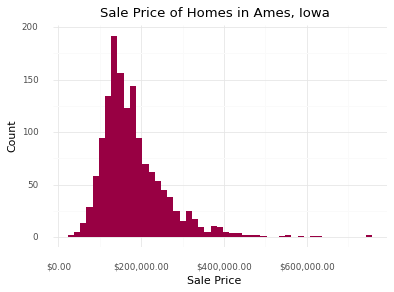

<ggplot: (8783703771368)>

In [43]:
ggplot(df_imputed) + gg.geom_histogram(aes('SalePrice'), fill = '#980043') + gg.xlab('Sale Price') + gg.ylab('Count') + gg.ggtitle('Sale Price of Homes in Ames, Iowa') + gg.scale_x_continuous(labels = mizani.formatters.currency_format(big_mark = ',')) + gg.theme_minimal()

<AxesSubplot:title={'center':'Top 7 Most Correlated Variables with Sale Price'}>

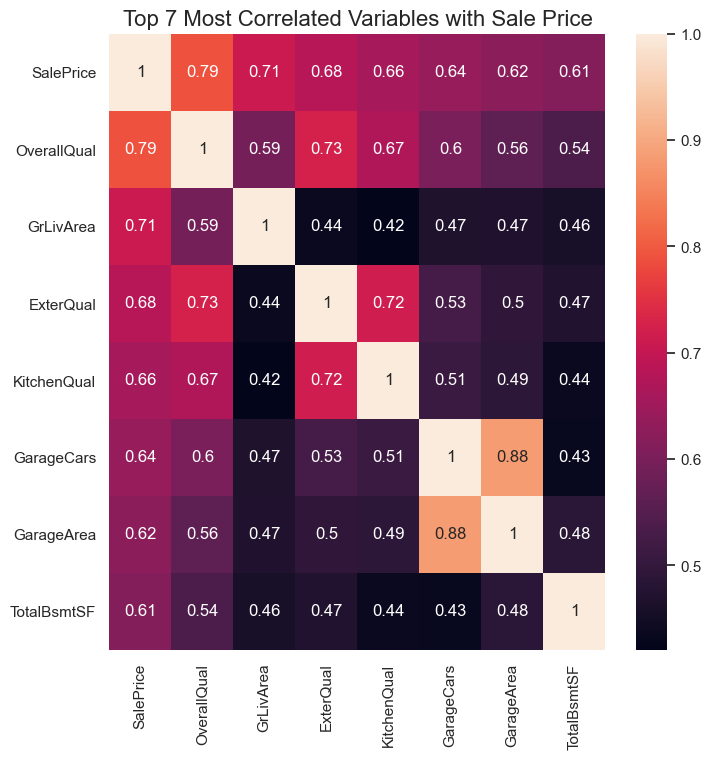

In [44]:
# plot the correlation matrix 
vars_to_use = ['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 
               'GarageCars', 'GarageArea', 'TotalBsmtSF'] # pick vars
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))
plt.title('Top 7 Most Correlated Variables with Sale Price', fontsize = 16)
sns.heatmap(df_imputed[vars_to_use].corr(), cmap=cmap, annot=True)


## Plot 1 
This plot is reflective of the most correlated variables with sale price in the final imputed training set. It just so happens that all the most correlated variables are positively correlated with the outcome of interest. The plot is organized from most to least respectively correlated variables, but all variables show the same general pattern of increase as sale prices go up. 

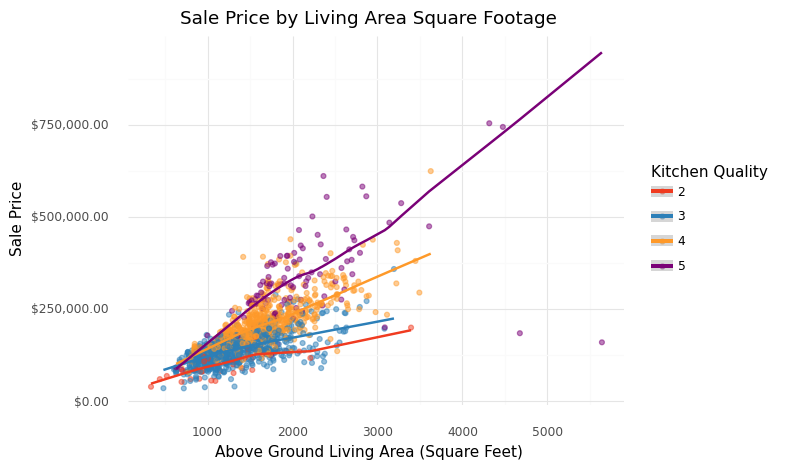

<ggplot: (8783653970911)>

In [45]:
ggplot(df_imputed, aes('GrLivArea', 'SalePrice', color = 'factor(KitchenQual)')) + geom_point(alpha = 0.5) + gg.stat_smooth() + gg.xlab('Above Ground Living Area (Square Feet)') + gg.ylab('Sale Price') + gg.scale_y_continuous(labels = mizani.formatters.currency_format(big_mark = ',')) + gg.ggtitle('Sale Price by Living Area Square Footage') + gg.labs(color = 'Kitchen Quality') + gg.scale_color_manual(('#f03b20', '#2c7fb8', '#fe9929', '#7a0177')) + gg.theme_minimal()

## Plot 2
This plot shows us the relationship between sale price, above ground living area square footage, and kitchen quality. From the underlying scatterplot, it is evident that as the square footage of living space increases, so does the sale price, which isn't necessarily a surprising relationship. However, it seems that the majority of houses in the dataset fall between 1000 and 2000 square feet of living space, and some observations serve as proof that large square footage does not necessarily mean higher sale price, as the general trend would suggest. Breaking this relationship down further into how each house was ranked on kitchen quality, we can see how the condition of the home's interior determines more about the sale price than how much room (square feet) the house has available for use. The red line and points show houses whose kitchen quality was ranked (2) "Fair." You'll notice that there is house with close to 3500 square feet of living space, but the low rated kitchen brings the sale price down. The trend goes on that way, with blue representing (3) "Typical/Average" rated kitchens, yellow indicating (4) "Good", and purple being those whose kitchen's were ranked as (5) "Excellent." It is notable to mention that higher quality kitchens naturally added to the home's value, but also that the purple homes are not necessarily *that* much bigger than the other homes in the dataset, indicating that quality may have more say over quanitity in this case on final sale price.

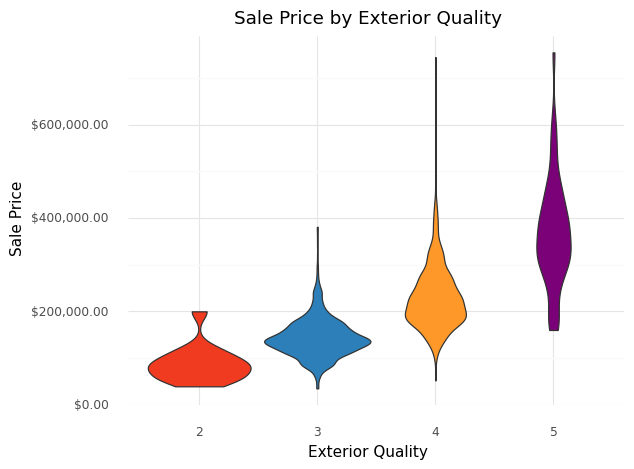

<ggplot: (8783674132869)>

In [46]:
ggplot(df_imputed) + gg.geom_violin(aes('factor(ExterQual)', 'SalePrice', fill = 'factor(ExterQual)'), show_legend = False) + gg.theme_minimal() + gg.xlab('Exterior Quality') + gg.ylab('Sale Price') + gg.ggtitle('Sale Price by Exterior Quality') + gg.scale_y_continuous(labels = mizani.formatters.currency_format(big_mark = ',')) + gg.scale_fill_manual(('#f03b20', '#2c7fb8', '#fe9929', '#7a0177'))

## Plot 3
This plot is simpler than the last, but it was important to depict the relationship between exterior quality and sale price as that was found to be the thrid most correlated variable with the outcome in the dataset. From this we gather that there is not a lot of variation in sale price for homes whose exterior quality was ranked (2) "Fair," with none selling for above \\$ 200,000. There is a bit more variation in sale price for homes with (3) "Average/Typical" exterior quality, but still these homes tend to sell for under \\$ 200,000. Once a home reaches (4) "Good" exterior quality, we begin to see average sale prices get a bit above the artifical \\$ 200,000 threshold affecting average (exterior) quality homes. The most variability in sale prices is seen at the highest ranking of exterior quality, 5) "Excellent." It is, again, obvious that exterior quality plays a role in adding to the sale price because it's what people see - it's a first impression - but, given the spread of sale prices in this category, it seems worthwhile to take a closer look at whether houses that appeared of high quality on the outside had the interior quality necessary to bolster sale prices. Below we take a look at the same plot, split out by the kitchen quality variable introduced in the previous plot.   

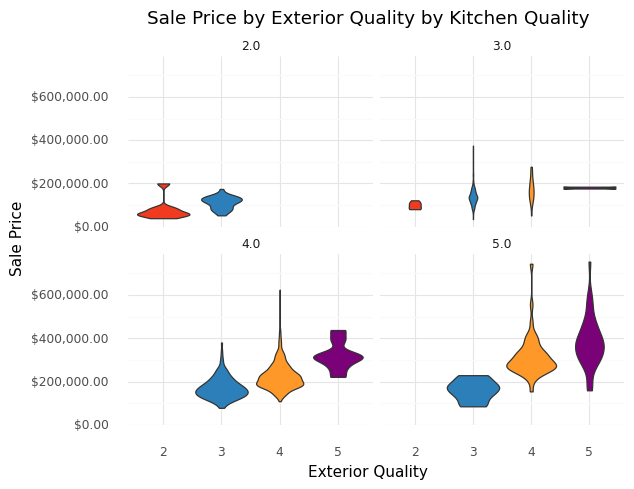

<ggplot: (8783674135989)>

In [47]:
ggplot(df_imputed) + gg.geom_violin(aes('factor(ExterQual)', 'SalePrice', fill = 'factor(ExterQual)'), show_legend = False) + gg.theme_minimal() + gg.xlab('Exterior Quality') + gg.ylab('Sale Price') + gg.ggtitle('Sale Price by Exterior Quality by Kitchen Quality') + gg.scale_y_continuous(labels = mizani.formatters.currency_format(big_mark = ',')) + gg.scale_fill_manual(('#f03b20', '#2c7fb8', '#fe9929', '#7a0177')) + facet_wrap('~KitchenQual')

## Plot(s) 4
Homes with "Fair" quality kitchens tend to have "Fair" - "Average" Exterior quality. Here it becomes more clear that there is a distinction in price between homes that have better interior than exterior conditions, indicating that sale prices for homes in these categories is potentially more influenced by what's on the inside. There does appear to be some homes of "Fair" quality in both categories whose sale price was surprisingly high - this indicates that these homes must have some other qualities to bring up their value. There were not a lot of homes in the dataset with "Average/Typical" kitchen quality, but the most interesting thing about those homes is particularly in the "Excellent" exterior quality violin, which shows a lack of variation in sale prices of homes with these particular characteristics. Homes whose interior (kitchen) quality was "Good" or "Excellent" tended to have average or better rankings for exterior quality. Homes with "Good" quality exterior tend to have the most variation in sale prices. It is obvious that as these interior and exterior conditions improve, the sale prices of the homes tend to go up. Lastly, it appears that most homes in the dataset have interior quality that is refective of exterior quality. For example, homes of "Fair" quality kitchens never had great quality exteriors, and the vice versa relationship can be observed as well for above average quality never resulting in below average for the respective variables. However, at the average level for either interior or exterior variable, quality of the complement could have been at any level. 

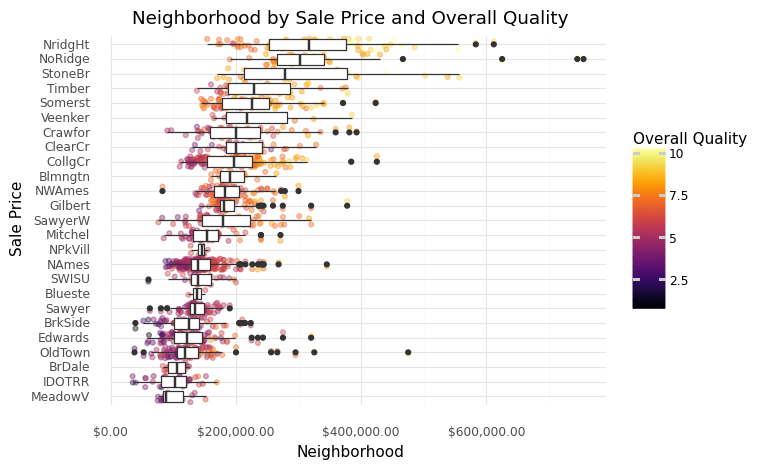

<ggplot: (8783674543601)>

In [48]:
#df_imputed.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
ggplot(df_imputed) + geom_point(aes('reorder(Neighborhood, SalePrice)', 'SalePrice', color = 'OverallQual'),alpha = 0.4, position = "jitter") + gg.geom_boxplot(aes('reorder(Neighborhood, SalePrice)', 'SalePrice')) + gg.coord_flip() + gg.theme_minimal() + gg.xlab('Sale Price') + gg.ylab('Neighborhood') + gg.ggtitle('Neighborhood by Sale Price and Overall Quality') + gg.scale_y_continuous(labels = mizani.formatters.currency_format(big_mark = ',')) + gg.labs(color = "Overall Quality") + gg.scale_color_cmap(cmap_name = 'inferno')

## Plot 5
There were 25 neighborhoods described by this dataset. As with any city, Ames, Iowa, has some neighborhoods that are more affluent than others, which is depicted above. While there tends to be more variation in sale prices of homes at the top of the list vs. the bottom, the lowest priced home in the most affluent neighborhood, Northridge Heights, is still more expensive than the majority of the homes in the bottom three neighborhoods. Furthermore, the relationship between overall quality of the homes and the sale prices becomes better explained by neighborhoods. Some neighborhoods are more likely to have higher quality homes, which are not necessarily commonplace across all of Ames, Iowa - low supply and high demand drives sale prices to increase in these neighborhoods. The plot shows that while the overall quality of a home is heavily indicative of price, the same can be said of home location in all reality. It is also interesting to note that some homes that were relatively expensive in their respective neighborhoods had extremely low overall quality rankings, which seems that it must be some sort of reporting error in the data that should be addressed if further predictive analytics are performed on this dataset. 

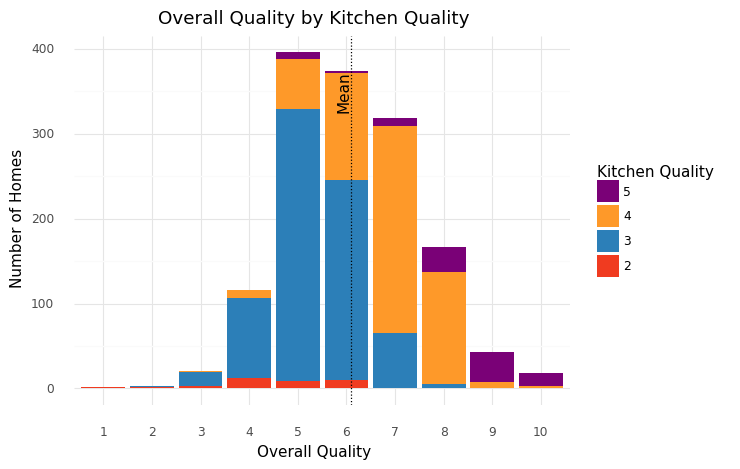

<ggplot: (8783654070956)>

In [49]:
# print(df_imputed.OverallQual.mean())
# print(df_imputed.OverallQual.std())
ggplot(df_imputed) + gg.geom_bar(aes(x = 'factor(OverallQual)', fill = pd.Categorical(df_imputed['KitchenQual']).set_categories(list(reversed(pd.Categorical(df_imputed['KitchenQual']).categories))))) + gg.scale_fill_manual(('#7a0177', '#fe9929', '#2c7fb8', '#f03b20'), name = "Kitchen Quality") + gg.theme_minimal() + gg.xlab('Overall Quality') + gg.ylab('Number of Homes') + gg.ggtitle('Overall Quality by Kitchen Quality') + gg.geom_vline(xintercept = df_imputed.OverallQual.mean(), linetype = 'dotted') + gg.annotate('text', x = df_imputed.OverallQual.mean(), y = 350, label = 'Mean', angle = 90, nudge_x = -0.15)

## Plot 6
Lastly, we wanted to analyze the distribution of the overall quality of the homes in the dataset. The average home ranks 6/10 in overall quality. The data appears to be fairly normally distributed, with the majority of homes having overall quality between 4 and 8, which is within two standard deviations of the mean. There were not many homes whose overall quality was 3 or below, but of those that were, it appears that most of them had "Fair" - "Average" kitchen quality. There does appear to be an outlier of "Good" kitchen quality in category 3, which seems like an odd observation that should be further explored in the future. Most homes of average or below overall quality had average interior quality; and most homes ranked above average had "Good" interior quality. The rare, high overall quality homes in the dataset tended to have "Excellent" rated kitchens in the majority. This, again, is in support of the idea that the qualitative variables in this dataset give great insight on a home's selling price and are likely decisive prognostic features of the outcome of interest. 